# Importing Libraries/Reading in Data

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('Data/Prem-Tomorrowland_posts_11-16.csv')
df.head()

,title,selftext,subreddit,created_utc
0,Genreverse,"Hi everyone, \n\nHere at Genreverse our ultima...",Tomorrowland,1637031457
1,Tomorrowland and it's bass line-up,So obviously Tomorrowland has always had a gre...,Tomorrowland,1637002849
2,Hand crafts 2021,NaN,Tomorrowland,1636935255
3,Winter TML lodging,hello! I have the 4 day pass without lodging a...,Tomorrowland,1636922669
4,Was Tomorrowland around the world 2020 a speci...,NaN,Tomorrowland,1636904090


In [3]:
df.shape

(2000, 4)

---

# Cleaning/Preprocessing/EDA

### Cleaning/Creating Length Columns

In [4]:
df.isnull().sum()

title            0
selftext       885
subreddit        0
created_utc      0
dtype: int64

In [5]:
df['selftext'].fillna('', inplace=True)  
# fill with a blank string. Almost even split between nulls for each subreddit (already checked in title notebook)

In [6]:
length = []
for i in df['selftext']:
    length.append(len(i))
    
df['selftext_length'] = length

In [7]:
num_words = []
for i in df['selftext']:
    num_words.append(len(i.split()))

df['selftext_word_count'] = num_words

In [8]:
df.head()

,title,selftext,subreddit,created_utc,selftext_length,selftext_word_count
0,Genreverse,"Hi everyone, \n\nHere at Genreverse our ultima...",Tomorrowland,1637031457,398,57
1,Tomorrowland and it's bass line-up,So obviously Tomorrowland has always had a gre...,Tomorrowland,1637002849,620,104
2,Hand crafts 2021,,Tomorrowland,1636935255,0,0
3,Winter TML lodging,hello! I have the 4 day pass without lodging a...,Tomorrowland,1636922669,334,65
4,Was Tomorrowland around the world 2020 a speci...,,Tomorrowland,1636904090,0,0


In [9]:
df.groupby('subreddit').mean()[['selftext_length', 'selftext_word_count']]

,selftext_length,selftext_word_count
subreddit,,
PremierLeague,182.256,28.285
Tomorrowland,196.799,33.495


**Premier Leauge posts tend to have shorter selftext lengths and word counts than Tomorrowland posts on average.**

In [10]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(df['selftext'])
selftext_cvec = cvec.transform(df['selftext'])

In [11]:
selftext_words = pd.DataFrame(selftext_cvec.todense(), columns=cvec.get_feature_names())
selftext_words

,00,000,001,005,005056aa7581,00s,01,02,03,04,...,zme2bw5qo,zomer,zone,zones,zonneveld,zoom,zouma,zzzz,ñíguez,čolak
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
selftext_words['which_sub'] = df['subreddit']

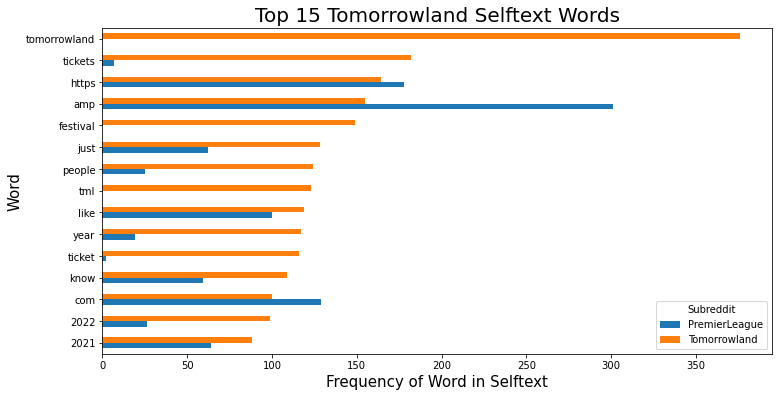

In [13]:
ax = selftext_words.groupby('which_sub').sum().T.sort_values('Tomorrowland', ascending=False).head(15).sort_values('Tomorrowland').plot(kind='barh', figsize=(12,6))
plt.title('Top 15 Tomorrowland Selftext Words', size=20)
plt.xlabel('Frequency of Word in Selftext', size=15)
plt.ylabel('Word', size=15)
ax.legend(title='Subreddit', labels=("PremierLeague","Tomorrowland"))
#plt.savefig('./Visuals/top15tomo_selftext_words.png', bbox_inches='tight');
plt.show();

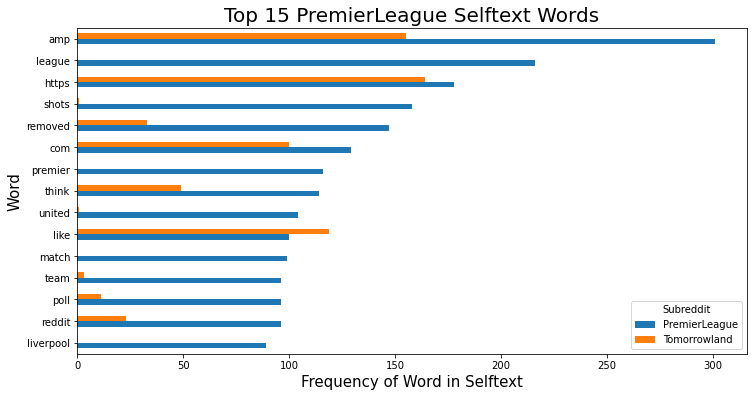

In [14]:
ax = selftext_words.groupby('which_sub').sum().T.sort_values('PremierLeague', ascending=False).head(15).sort_values('PremierLeague').plot(kind='barh', figsize=(12,6))
plt.title('Top 15 PremierLeague Selftext Words', size=20)
plt.xlabel('Frequency of Word in Selftext', size=15)
plt.ylabel('Word', size=15)
ax.legend(title='Subreddit', labels=("PremierLeague","Tomorrowland"))
#plt.savefig('./Visuals/top15prem_selftext_words.png', bbox_inches='tight');
plt.show();

*There seems to be more overlap of top occuring words in the selftext than there was in the titles.  Not sure if accuracy scores will be as good in these models*

In [15]:
selftext_and_words = pd.merge(df, selftext_words, on=df.index)
selftext_and_words.drop(columns='key_0', inplace=True)

In [16]:
selftext_and_words.head(2)

,title_x,selftext,subreddit_x,created_utc,selftext_length,selftext_word_count,00,000,001,005,...,zomer,zone,zones,zonneveld,zoom,zouma,zzzz,ñíguez,čolak,which_sub
0,Genreverse,"Hi everyone, \n\nHere at Genreverse our ultima...",Tomorrowland,1637031457,398,57,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tomorrowland
1,Tomorrowland and it's bass line-up,So obviously Tomorrowland has always had a gre...,Tomorrowland,1637002849,620,104,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tomorrowland


In [17]:
prem_selftext_words = selftext_and_words[selftext_and_words['subreddit_x'] == 'PremierLeague'].drop(columns=['title_x', 'selftext', 
                                                                                                    'subreddit_x', 'created_utc',
                                                                                                    'selftext_length', 'selftext_word_count',
                                                                                                    'which_sub'])
top15_prem_selftext_words = prem_selftext_words.sum().sort_values(ascending=False).head(15)
top15_prem_selftext_words

amp          301
league       216
https        178
shots        158
removed      147
com          129
premier      116
think        114
united       104
like         100
match         99
reddit        96
poll          96
team          96
liverpool     89
dtype: int64

<BarContainer object of 15 artists>

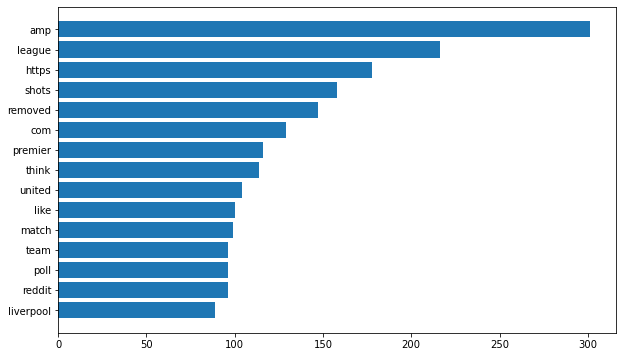

In [18]:
plt.figure(figsize=(10,6))
plt.barh(y=top15_prem_selftext_words.sort_values().index, width=top15_prem_selftext_words.sort_values())

In [19]:
tomo_selftext_words = selftext_and_words[selftext_and_words['subreddit_x'] == 'Tomorrowland'].drop(columns=['title_x', 'selftext', 
                                                                                                    'subreddit_x', 'created_utc',
                                                                                                    'selftext_length', 'selftext_word_count', 
                                                                                                   'which_sub'])
top15_tomo_selftext_words = tomo_selftext_words.sum().sort_values(ascending=False).head(15)
top15_tomo_selftext_words

tomorrowland    376
tickets         182
https           164
amp             155
festival        149
just            128
people          124
tml             123
like            119
year            117
ticket          116
know            109
com             100
2022             99
2021             88
dtype: int64

<BarContainer object of 15 artists>

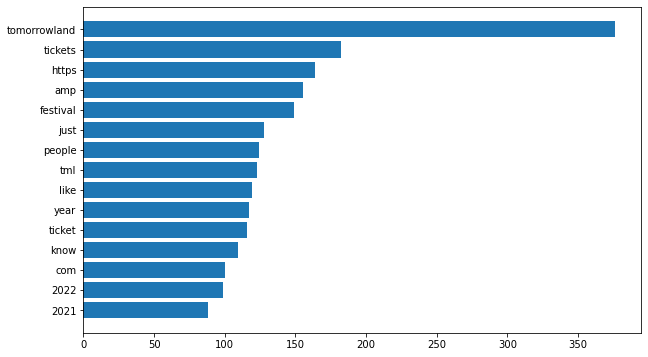

In [20]:
plt.figure(figsize=(10,6))
plt.barh(y=top15_tomo_selftext_words.sort_values().index, width=top15_tomo_selftext_words.sort_values())

---

# Models

### Model Preparation

In [21]:
df['subreddit'] = df['subreddit'].map({'Tomorrowland': 0, 'PremierLeague': 1})

In [22]:
X = df['selftext']
y = df['subreddit']

In [23]:
y.value_counts(normalize=True)
# baseline accuracy of 50% if predicting subreddit is from Premier League subreddit <- looking to beat this

0    0.5
1    0.5
Name: subreddit, dtype: float64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

---

### Model 1 - KNN with CountVectorizer

In [25]:
pipe1 = Pipeline([
    ('cvec', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [26]:
params1 = {
    'cvec__min_df': [15, 16, 17],
    'cvec__max_df': [.1, .2, .3],
    'cvec__binary': [True, False],
    'cvec__stop_words': [None, 'english'],
    'knn__weights': ['uniform', 'distance']
}

In [27]:
gs1 = GridSearchCV(pipe1, param_grid=params1)
gs1.fit(X_train, y_train)
print(gs1.best_score_)
gs1.best_params_

0.6693333333333333


{'cvec__binary': False,
 'cvec__max_df': 0.2,
 'cvec__min_df': 16,
 'cvec__stop_words': 'english',
 'knn__weights': 'uniform'}

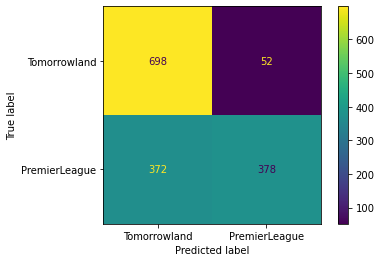

In [28]:
plot_confusion_matrix(gs1, X_train, y_train, display_labels=['Tomorrowland', 'PremierLeague'])

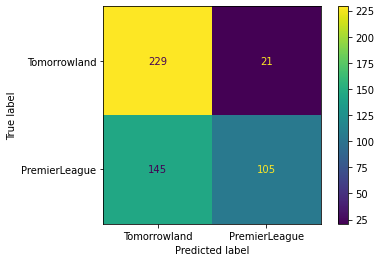

In [29]:
plot_confusion_matrix(gs1, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [30]:
preds1 = gs1.predict(X_test)
X_test[(y_test != preds1) & (preds1 == 1)].head(60)

270    Ugh of course they messed up PDT again, where ...
937    Getting static / distortion while playing thro...
106                                            [removed]
475                                            [removed]
553                                            [removed]
491    Hello all! Since we still don't know if the fe...
562                                            [removed]
214                                            [removed]
413    I saw some of you wondering when/who received ...
987    Includes Train ride from Amsterdam to Belgium\...
269    Not only that I have to see that "You are a pi...
928    Sorry if this is a stupid question - I was jus...
337    Hey guys, do u know if there is any discount c...
98                                             [removed]
315    I‘m amazed by the quality of everything surrou...
880                                            [removed]
782    When are we able to and when is the deadline t...
540                            

In [31]:
X_test[(y_test != preds1) & (preds1 == 1)].tail(60)

270    Ugh of course they messed up PDT again, where ...
937    Getting static / distortion while playing thro...
106                                            [removed]
475                                            [removed]
553                                            [removed]
491    Hello all! Since we still don't know if the fe...
562                                            [removed]
214                                            [removed]
413    I saw some of you wondering when/who received ...
987    Includes Train ride from Amsterdam to Belgium\...
269    Not only that I have to see that "You are a pi...
928    Sorry if this is a stupid question - I was jus...
337    Hey guys, do u know if there is any discount c...
98                                             [removed]
315    I‘m amazed by the quality of everything surrou...
880                                            [removed]
782    When are we able to and when is the deadline t...
540                            

---

### Model 2 - KNN with TFIDF

In [32]:
pipe2 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [33]:
params2 = {
    'knn__n_neighbors': [4, 5, 6, 7],
    'tvec__stop_words': ['english', None],
    'tvec__min_df': [22, 23, 24, 25, 26, 27],
    'tvec__max_df': [.1, .2, .3],
    'tvec__ngram_range': [(1,1), (1,2)]
}

In [34]:
gs2 = GridSearchCV(pipe2, param_grid=params2)
gs2.fit(X_train, y_train)
print(gs2.best_score_)
gs2.best_params_

0.6859999999999999


{'knn__n_neighbors': 5,
 'tvec__max_df': 0.1,
 'tvec__min_df': 24,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

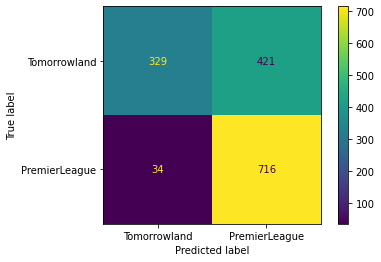

In [35]:
plot_confusion_matrix(gs2, X_train, y_train, display_labels=['Tomorrowland', 'PremierLeague'])

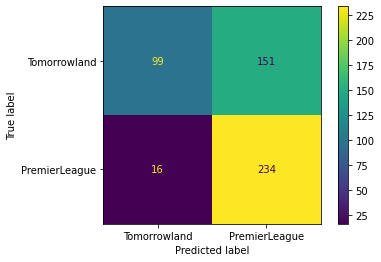

In [36]:
plot_confusion_matrix(gs2, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

---

### Model 3 - Logistic Regression with CountVectorizer

In [37]:
pipe3 = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression())
])

In [38]:
params3 = {
    'cvec__min_df': [1, 2, 3],
    'cvec__max_df': [.1, .2, .3],
    'cvec__binary': [True, False],
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1,1), (1,2)],
    'logreg__C': [1, 2, 3]
}

In [39]:
gs3 = GridSearchCV(pipe3, param_grid=params3)
gs3.fit(X_train, y_train)
print(gs3.best_score_)
gs3.best_params_

0.7360000000000001


{'cvec__binary': True,
 'cvec__max_df': 0.1,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'logreg__C': 1}

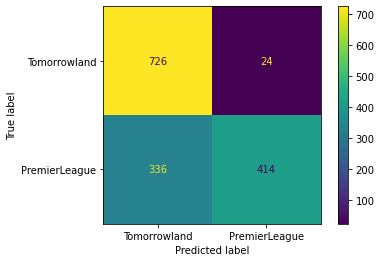

In [40]:
plot_confusion_matrix(gs3, X_train, y_train, display_labels=['Tomorrowland', 'PremierLeague'])

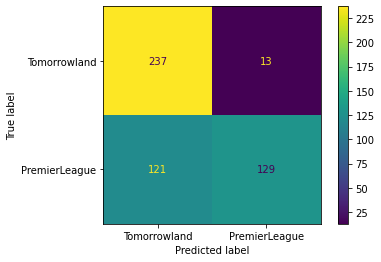

In [41]:
plot_confusion_matrix(gs3, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

---

### Model 4 - Logistic Regression with TFIDF

In [42]:
pipe4 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('logreg', LogisticRegression())
])

In [43]:
params4 = {
    'tvec__stop_words': [None, 'english'],
    'tvec__min_df': [1, 2, 3, 4, 5],
    'tvec__max_df': [.2, .3, .4],
    'tvec__ngram_range': [(1,1), (1,2)],
    'logreg__C': [1, 2, 3]
}

In [44]:
gs4 = GridSearchCV(pipe4, param_grid=params4)
gs4.fit(X_train, y_train)
print(gs4.best_score_)
gs4.best_params_

0.74


{'logreg__C': 3,
 'tvec__max_df': 0.2,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

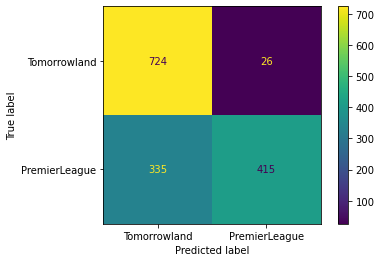

In [45]:
plot_confusion_matrix(gs4, X_train, y_train, display_labels=['Tomorrowland', 'PremierLeague'])

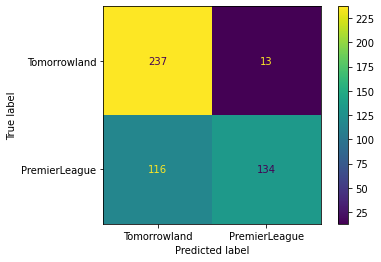

In [46]:
plot_confusion_matrix(gs4, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

---

### Model 5 - Decision Tree with CountVectorizer

In [47]:
pipe5 = Pipeline([
    ('cvec', CountVectorizer()),
    ('dt', DecisionTreeClassifier())
])

In [48]:
params5 = {
    'cvec__min_df': [1, 2, 3, 4],
    'cvec__max_df': [.1, .2, .3, .4],
    'cvec__binary': [True, False],
    'cvec__stop_words': ['english', None],
    'dt__random_state': [10],
    'dt__min_samples_split': [5, 6, 7, 8, 9, 10]
}

In [49]:
gs5 = GridSearchCV(pipe5, param_grid=params5)
gs5.fit(X_train, y_train)
print(gs5.best_score_)
gs5.best_params_

0.7133333333333333


{'cvec__binary': True,
 'cvec__max_df': 0.2,
 'cvec__min_df': 2,
 'cvec__stop_words': 'english',
 'dt__min_samples_split': 8,
 'dt__random_state': 10}

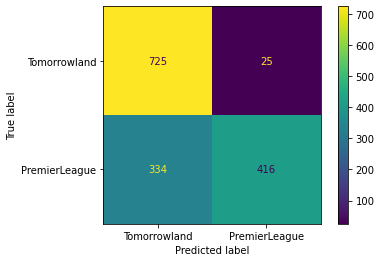

In [50]:
plot_confusion_matrix(gs5, X_train, y_train, display_labels=['Tomorrowland', 'PremierLeague'])

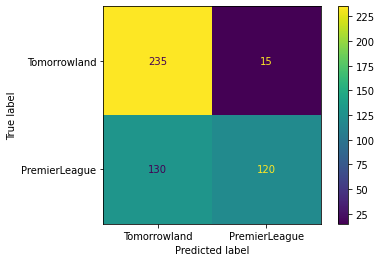

In [51]:
plot_confusion_matrix(gs5, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

---

### Model 6 - Decision Tree with TFIDF

In [52]:
pipe6 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('dt', DecisionTreeClassifier())
])

In [53]:
params6 = {
    'tvec__stop_words': ['english', None],
    'tvec__min_df': [2, 3, 4, 5, 6],
    'tvec__max_df': [.1, .2, .3, .4],
    'tvec__ngram_range': [(1,1), (1,2)],
    'dt__random_state': [42],
    'dt__min_samples_split': [2, 3, 4]
}

In [54]:
gs6 = GridSearchCV(pipe6, param_grid=params6)
gs6.fit(X_train, y_train)
print(gs6.best_score_)
gs6.best_params_

0.7033333333333334


{'dt__min_samples_split': 3,
 'dt__random_state': 42,
 'tvec__max_df': 0.2,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

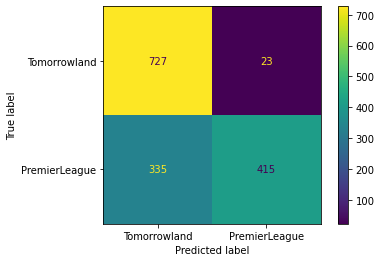

In [55]:
plot_confusion_matrix(gs6, X_train, y_train, display_labels=['Tomorrowland', 'PremierLeague'])

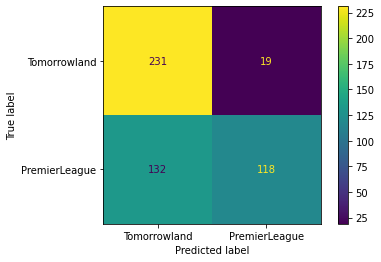

In [56]:
plot_confusion_matrix(gs6, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

---

### Model 7 - RandomForest with CountVectorizer

In [57]:
pipe7 = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [58]:
params7 = {
    'cvec__min_df': [1, 2, 3, 4],
    'cvec__max_df': [.1, .2, .3, .4],
    'cvec__binary': [True, False],
    'cvec__stop_words': ['english', None],
    'rf__random_state': [42]
}

In [59]:
gs7 = GridSearchCV(pipe7, param_grid=params7)
gs7.fit(X_train, y_train)
print(gs7.best_score_)
gs7.best_params_

0.7366666666666667


{'cvec__binary': True,
 'cvec__max_df': 0.2,
 'cvec__min_df': 2,
 'cvec__stop_words': 'english',
 'rf__random_state': 42}

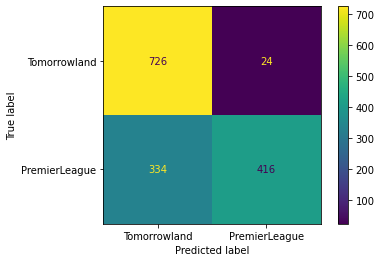

In [60]:
plot_confusion_matrix(gs7, X_train, y_train, display_labels=['Tomorrowland', 'PremierLeague'])

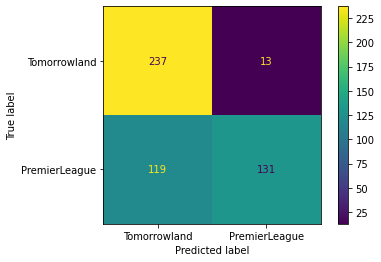

In [61]:
plot_confusion_matrix(gs7, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

---

### Model 8 - RandomForest with TFIDF

In [62]:
pipe8 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

In [63]:
params8 = {
    'tvec__stop_words': [None, 'english'],
    'tvec__min_df': [1, 2, 3, 4, 5],
    'tvec__max_df': [.2, .3, .4],
    'tvec__ngram_range': [(1,1), (1,2)],
    'rf__random_state': [42]
}

In [64]:
gs8 = GridSearchCV(pipe8, param_grid=params8)
gs8.fit(X_train, y_train)
print(gs8.best_score_)
gs8.best_params_

0.7353333333333334


{'rf__random_state': 42,
 'tvec__max_df': 0.2,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

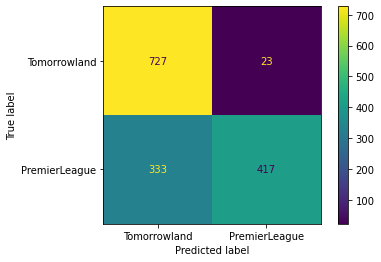

In [65]:
plot_confusion_matrix(gs8, X_train, y_train, display_labels=['Tomorrowland', 'PremierLeague'])

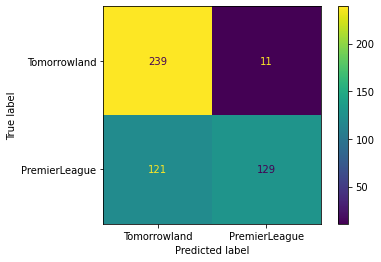

In [66]:
plot_confusion_matrix(gs8, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])